# Predicting House prices in IOWA(Ames) using Regression Analysis
## Written by James Wilfred N. and Gerard Shu Fuhnwi

 The cost of housing in the United States varies from state to state, with some state said to be very expensive to buy a house compared to others. We are setting up to use data from the state of  IOWA to predict the prices of Houses in a major city of Iowa-Ames 



## Import Libraries
Let's import some libraries to get started!


In [358]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.interpolate as p
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import statsmodels.api as sm
%matplotlib inline
from statsmodels.graphics.regressionplots import * 
import statsmodels.formula.api as smf
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV  
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import warnings

# Get the Data

We are obtaining our data from Kaggle.com.The specific link to the dataset is:
* https://www.kaggle.com/c/iowa-house-prices-regression-techniques/data

Here's a brief version of what you'll find in the data description file.
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


#### Read in the Iowa Housing csv file as a DataFrame called housing.

In [359]:
housing=pd.read_csv("train.csv")

## Exploratory Data Analysis


#### Check the head of housing , and check out its info() and describe() methods.

In [360]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Overview of Data Structure
#### Our data structure has 81 variable which are partioned as follows:
* 37 are Quantitative
* 43 are Qualitative 
* we have 1 response variable 


#### Housing.describe() gives us a statistical description of each of our variables 

In [361]:
print(housing.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [362]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [363]:
print(housing.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'firstFlrSF', 'secondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

In [364]:
print(housing.SalePrice.head(10))

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64


#### Fig1 below was used to show which variables in the data had Null values(NA) and  enable us decide which technique to utilize to replace them or whether to completely get raid off them. From the heatmap we can observe that the PoolQC and Alley variables had the highest number of NA values but we did not replace those because NA in this case  was not the absence of a data value but the absence of those particular features in the houses.

Text(0.5,1,'Fig1: HeatMap for NAs')

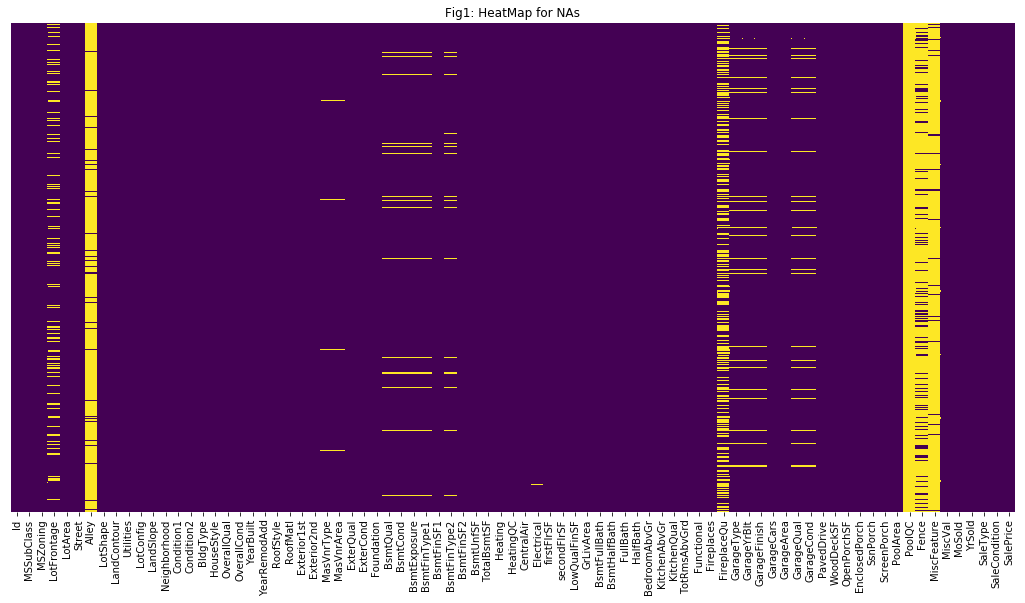

In [365]:
plt.figure(figsize=(18,9))
ax=sns.heatmap(housing.isnull(),yticklabels=False,cbar=False,cmap='viridis')
ax.set_title('Fig1: HeatMap for NAs')

### Fig2:HeatMap Correlation shows the correlation between all our variables and from Fig2 we can see that most of our Qualitative variables are not correlated with the reponse variable SalePrice. Using Fig2 results was the main reason for us not to use  Qualitative variables  in building our model.

Text(0.5,1,'Fig2:HeatMap Correlation')

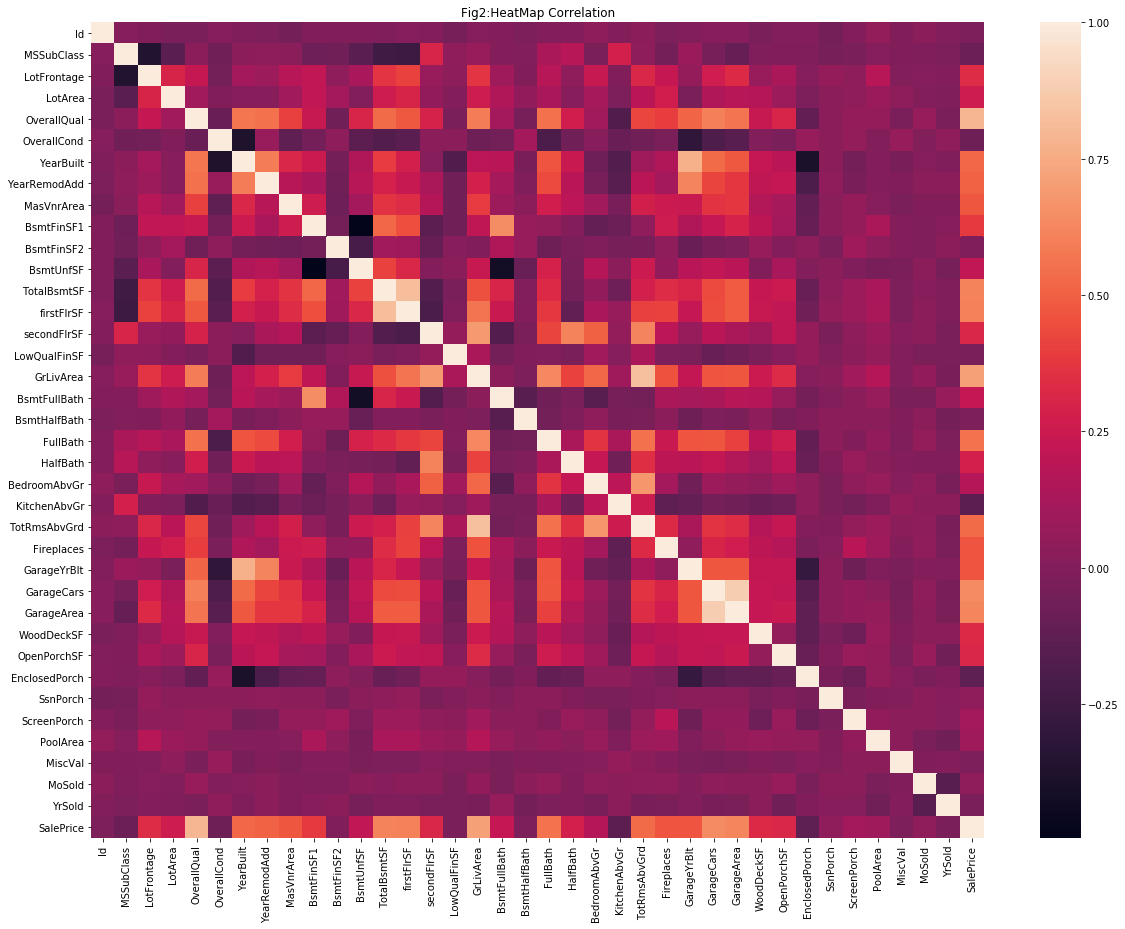

In [453]:
plt.figure(1, figsize=(20, 15))
corr = housing.corr()
ax=sns.heatmap(corr)
ax.set_title('Fig2:HeatMap Correlation')

### From the decision made using Fig2 we extracted the quantitative variables(predictor variables) that are more correlated with our response variable 'salePrice'.We further drop the variable 'Id' since it did not have any statistical significance. We replaced our NA in the quantitative Variables using the Absolute Median Technique. Our choice of the median was because the Median is not affected by extreme values. 

In [437]:
quantitative =[f for f in housing.columns if housing[f].dtype != 'object']
quantitative.remove('Id')
H=housing[quantitative]=housing[quantitative].fillna(housing[quantitative].median())



### The correlation between the predictor variables and the response variable was to determine which predictor variable were most significant interms of 'SalePrice' and those that are highly correlated among themselves for example "GarageCars" is highly correlated with "GarageArea" so for the the purpose of our final model we dropped predictor variable highly correlated among themselves.We also dropped predictor variables that had low correlation with the response variable. We chose the following predictor variables to build our model:
* OverallQual 79 % correlation with SalePrice
* GrLivArea   70 % correlation with SalePrice
* GarageCars  64 % correlation with SalePrice
* GarageArea  62 % correlation with SalePrice
* FirstFlrSF  61 % correlation with SalePrice
* TotalBsmtSF 60 % correlation with SalePrice
* FullBath    56 % correlation with SalePrice
* TotRmsAbGrd 53 % correlation with SalePrice
* Yearbuilt   52 % correlation with SalePrice

* The table below shows us the numerically the correlation between the quantitative predictor variables and the response variable and among predictors. This computation of correlation is a numerical aid to the heat map above 

In [438]:
H.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


** Plots to check of the response variable is normally distributed, before building the Model.**

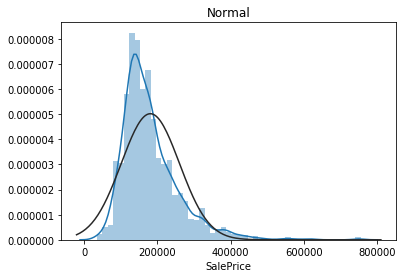

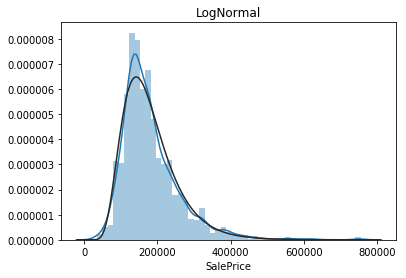

In [440]:
x1= housing['SalePrice']
plt.figure(1); plt.title('Normal')
sns.distplot(housing['SalePrice'], fit=stats.norm);
plt.figure(2); plt.title('LogNormal')
sns.distplot(housing['SalePrice'], fit=stats.lognorm);

** Boxplots of the Selected Quantitative Variables showing outliers.**

** The Boxplots shows that most of the outlier points are in the response variable.we decided not to clean up the outliers in the response variable because we want our model to be representative of all the population, that is to say, some might use the model to predict price of very expensive houses whereas others will use this model to predict price of relatively less expensive houses. Therefore cleaning outliers would have removed the price range of the two categories of people descibed.**

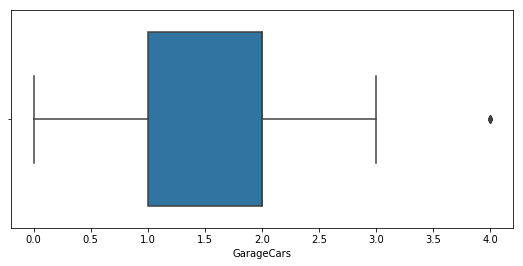

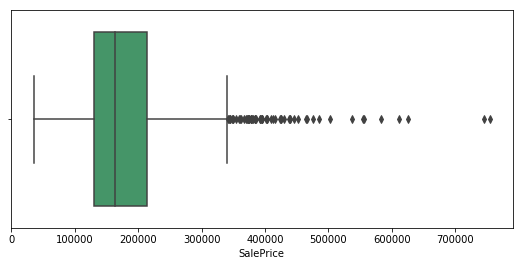

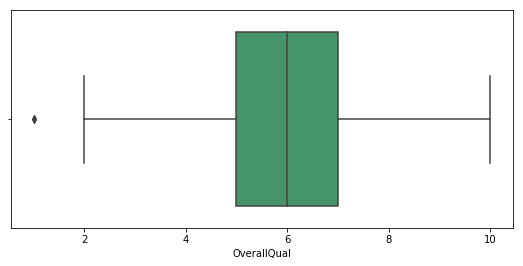

In [441]:
plt.figure(figsize=(9,4))
sns.boxplot(H["GarageCars"])
plt.figure(figsize=(9,4))
sns.boxplot(H["SalePrice"],palette="BuGn_d")
plt.figure(figsize=(9,4))
sns.boxplot(H["OverallQual"],palette="BuGn_d")
plt.figure(figsize=(9,4))

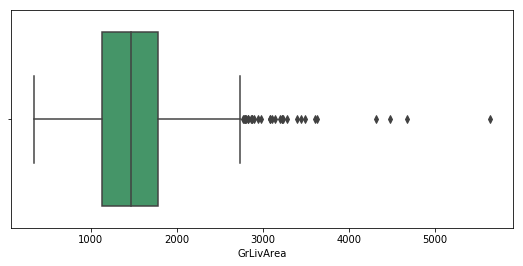

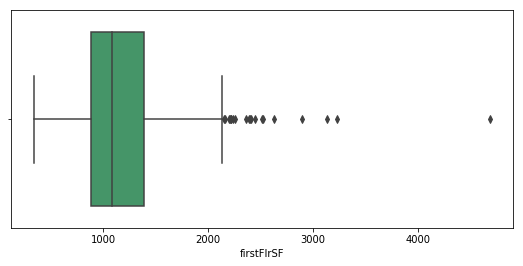

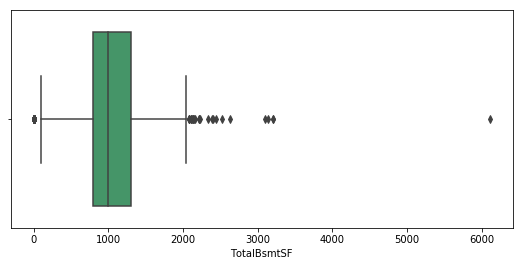

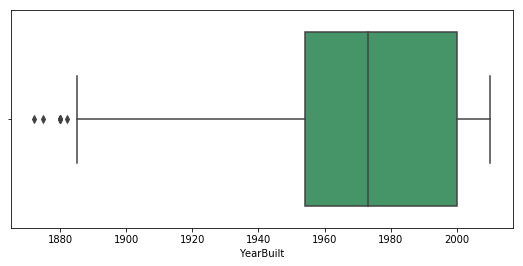

In [442]:
plt.figure(figsize=(9,4))
sns.boxplot(H["GrLivArea"],palette="BuGn_d")
plt.figure(figsize=(9,4))
sns.boxplot(H["firstFlrSF"],palette="BuGn_d")
plt.figure(figsize=(9,4))
sns.boxplot(H["TotalBsmtSF"],palette="BuGn_d")
plt.figure(figsize=(9,4))
sns.boxplot(H["YearBuilt"],palette="BuGn_d")

# MODELING


### Simple Linear Model

### Model One
* The model plots the response variable(salePrice) against the predictor variable with the most significant correlation coefficient(OverallQual)

In [443]:
model1 = smf.ols(formula='SalePrice~OverallQual',data=H).fit()

#### From the summary of Model 1 we can observe an adj.R-squared of 62.5%. Adj R-squared measures the proportion of the variation in your dependent variable (SalePrice) explained by your independent variables (OverallQual) for a linear regression model.

* Adj. R-Squared might change, each time a significant variable is added to the model.
* (each time during the project that we perform this test we will be performing the Goodness of fit test).

#### The p value for the predictor variable is relatively small which means it is statistically significant.
* A P-value measures the strength of evidence in support of a null hypothesis. Suppose the test statistic in a hypothesis test is equal to S. The P-value is the probability of observing a test statistic as extreme as S, assuming the null hypotheis is true. If the P-value is less than the significance level, we reject the null hypothesis.

* The Durbin-Watson test statistic tests the null hypothesis that the residuals from an ordinary least-squares regression are not autocorrelated against the alternative that the residuals follow an AR1 process. The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.

* Auto correlation it is the similarity between observations as a function of the time lag between them.

In [444]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Tue, 01 May 2018   Prob (F-statistic):          2.19e-313
Time:                        11:31:33   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [445]:
residual1 = model1.resid

** QQ-Plots to check Normality of Residuals for Model 1, which shows no normality.**

Text(0.5,1,'Fig3:Model 1 QQ plot')

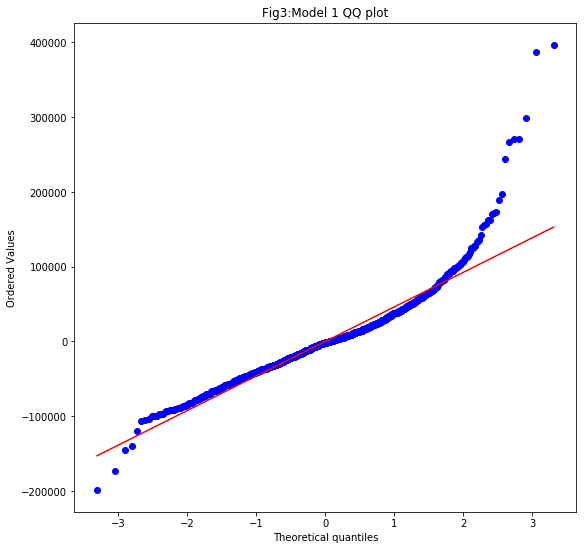

In [446]:
fig=plt.figure(figsize=(9,9))
ax=fig.add_subplot(111)
stats.probplot(residual1, dist="norm", plot=plt)
ax.set_title('Fig3:Model 1 QQ plot')



** RMSE The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample and population values) predicted by a model or an estimator and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values. These individual differences are called residuals when the calculations are performed over the data sample that was used for estimation, and are called prediction errors when computed out-of-sample. The RMSD serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power. RMSD is a measure of accuracy, to compare forecasting errors of different models for a particular dataset and not between datasets, as it is scale-dependent (The lower the RMSE, the better the model).**

In [447]:
Sales_pred1=model1.predict(pd.DataFrame(H['OverallQual']))

print('MAE:', metrics.mean_absolute_error(H['SalePrice'], Sales_pred1))
print('MSE:', metrics.mean_squared_error(H['SalePrice'], Sales_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(H['SalePrice'], Sales_pred1)))

MAE: 33722.0479444
MSE: 2360934371.57
RMSE: 48589.4471214


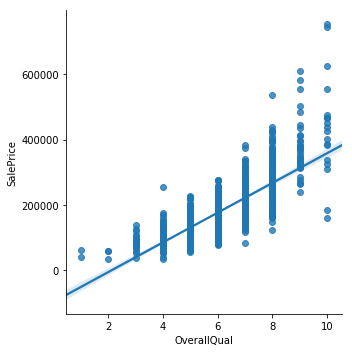

In [448]:
ax=sns.lmplot(x='OverallQual',y='SalePrice',data=H)

### The Fig below shows Analysis of OverQuall with Fitted Values, SalePrice and Residuals

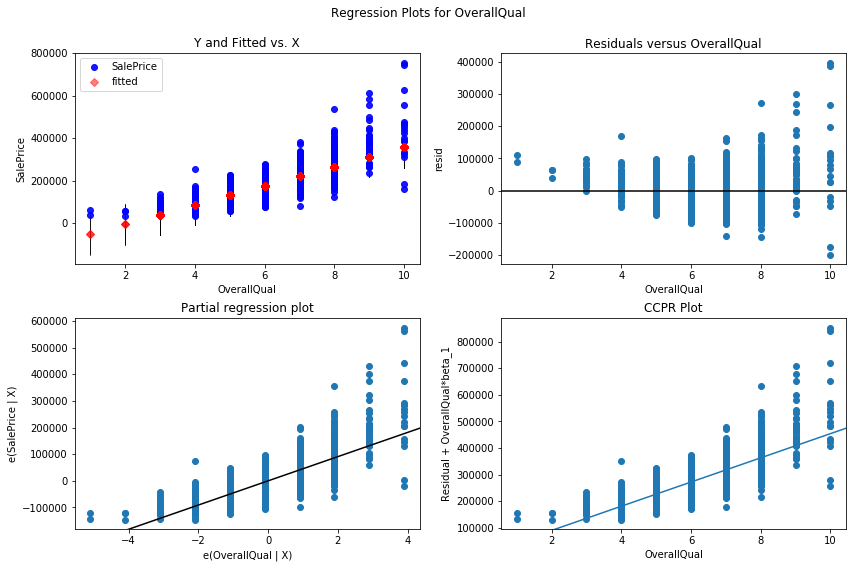

In [449]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model1, 'OverallQual', fig = fig)

### Multiple Regression

### Model Two

In [450]:
model2 = smf.ols(formula='SalePrice~OverallQual + GrLivArea' ,data=H).fit()

** From model 2 summary, we can observe an increase in Adj. R-Squared from 62.5 % to 71.4 %. Also, the intercept and the predictor variables are significant due to low P-values.**

In [451]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1820.
Date:                Tue, 01 May 2018   Prob (F-statistic):               0.00
Time:                        11:31:41   Log-Likelihood:                -17630.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1457   BIC:                         3.528e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.041e+05   5045.372    -20.631      0.000   -1.14e+05   -9.42e+04
OverallQual  3.285e+04    999.198     32.875      0.000    3.09e+04    3.48e+04
GrLivArea      55.8622      2.630     21.242      0.000      50.704      61.021
==============================================================================
Omnibus:                      341.985   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8725.150
Skew:                           0.469   Prob(JB):                         0.00
Kurtosis:                      14.939   Cond. No.                     7.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis of Variance Test(ANOVA): It is a way to find out if the results of your survey or experiment are significant based on P-Values.

In [452]:
sm.stats.anova_lm(model2, type = 1)

,df,sum_sq,mean_sq,F,PR(>F)
OverallQual,1.0,5.760947e+12,5.760947e+12,3189.256158,0.000000e+00
GrLivArea,1.0,8.150966e+11,8.150966e+11,451.236867,1.870508e-87
Residual,1457.0,2.631868e+12,1.806361e+09,NaN,NaN


#### RMSE is lower in model two compared to model one, so model two might be better for prediction than model one.

In [383]:
Sales_pred2=model2.predict(pd.DataFrame(H[['OverallQual','GrLivArea']]))
print('MAE:', metrics.mean_absolute_error(H['SalePrice'], Sales_pred2))
print('MSE:', metrics.mean_squared_error(H['SalePrice'], Sales_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(H['SalePrice'], Sales_pred2)))

MAE: 28756.4127841
MSE: 1802649051.76
RMSE: 42457.6147677


In [384]:
residual2 = model2.resid

### Variance inflation factor is a measure of multicollinearity between predictor variables in an ordinary least squares regression analysis.
* It provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of collinearity.
* The square root of the variance inflation factor indicates how much larger the standard error is, compared with what it would be if that variable were uncorrelated with the other predictor variables in the model.This  means that the standard error for the coefficient of that predictor variable in our model is 1.87 times as large as it would be if that predictor variable were uncorrelated with the other predictor variables.
* multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. 

In [385]:
VIF = 1/(1-model2.rsquared)
VIF

3.498622529546918

In [386]:
np.sqrt(VIF)

1.8704605126938441

** QQ-Plots to check Normality of Residuals for model, which shows no Normality.**

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-379572.48333534, -300859.57310956, -168422.8385768 , ...,
          270562.87207176,  288049.94062714,  289500.82821682])),
 (40005.255462784597, 4.0912917190473585e-09, 0.94036236156111541))

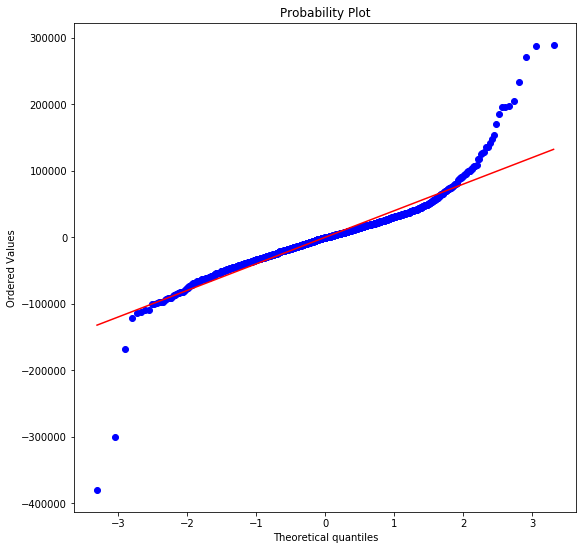

In [387]:
plt.figure(figsize=(9,9))
stats.probplot(residual2, dist="norm", plot=plt)

** Partial Regression Plots  to check constant Variance, which shows no constant Variance.**

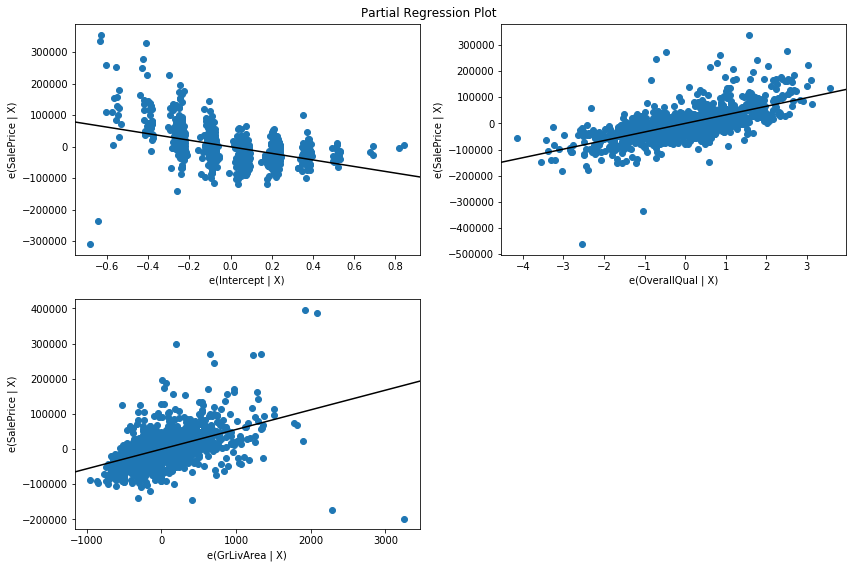

In [388]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model2, fig = fig)

### Model Three

In [389]:
model3 = smf.ols(formula='SalePrice~OverallQual + GrLivArea+GarageCars',data=H).fit()

**From model 3 summary, we can observe an increase in Adj. R-Squared from 71.4 % to 73.9 %.  Also, the intercept and the predictor variables are significant due to low P-values.**

In [390]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1375.
Date:                Tue, 01 May 2018   Prob (F-statistic):               0.00
Time:                        11:20:22   Log-Likelihood:                -17563.
No. Observations:                1460   AIC:                         3.513e+04
Df Residuals:                    1456   BIC:                         3.516e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.883e+04   4842.897    -20.408      0.000   -1.08e+05   -8.93e+04
OverallQual   2.71e+04   1072.182     25.280      0.000     2.5e+04    2.92e+04
GrLivArea      50.6742      2.552     19.859      0.000      45.669      55.680
GarageCars    2.13e+04   1807.065     11.786      0.000    1.78e+04    2.48e+04
==============================================================================
Omnibus:                      419.972   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9575.801
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                      15.447   Cond. No.                     7.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** RMSE is lower in model three compared to model two, so model three might be better for prediction than model two.**

In [391]:
Sales_pred3=model3.predict(pd.DataFrame(H[['OverallQual','GrLivArea','GarageCars']]))
print('MAE:', metrics.mean_absolute_error(H['SalePrice'], Sales_pred3))
print('MSE:', metrics.mean_squared_error(H['SalePrice'], Sales_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(H['SalePrice'], Sales_pred3)))

MAE: 27483.8418912
MSE: 1645634055.53
RMSE: 40566.4153646


In [392]:
residual3 = model3.resid

In [393]:
VIF = 1/(1-model3.rsquared)
VIF

3.83243684350672

** This means that the standard error for the coefficient of that predictor variable in our model is 1.9577 times as large as it would be if that predictor variable were uncorrelated with the other predictor variables.**

In [394]:
np.sqrt(VIF)

1.9576610645121182

### The ANOVA shows that all the predictor variables are significant in Model 3

In [395]:
sm.stats.anova_lm(model3, type = 1)

,df,sum_sq,mean_sq,F,PR(>F)
OverallQual,1.0,5.760947e+12,5.760947e+12,3491.155106,0.000000e+00
GrLivArea,1.0,8.150966e+11,8.150966e+11,493.951509,1.826952e-94
GarageCars,1.0,2.292419e+11,2.292419e+11,138.921429,1.082624e-30
Residual,1456.0,2.402626e+12,1.650155e+09,NaN,NaN


** QQ-Plots for Normality of Residuals for Model 3, which shows no Normality.**

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-340717.58681293, -288315.25835118, -125863.20331431, ...,
          282069.58393232,  282855.3444176 ,  300177.45775912])),
 (38045.639000492913, 1.586392450802392e-08, 0.93599177359889529))

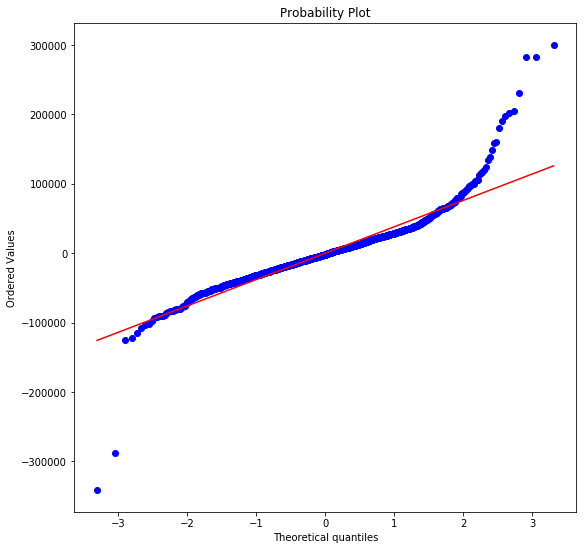

In [396]:
plt.figure(figsize=(9,9))
stats.probplot(residual3, dist="norm", plot=plt)

** Partial Rgression Plots to check for Constant Variance of residuals, which shows no constant Variance.**

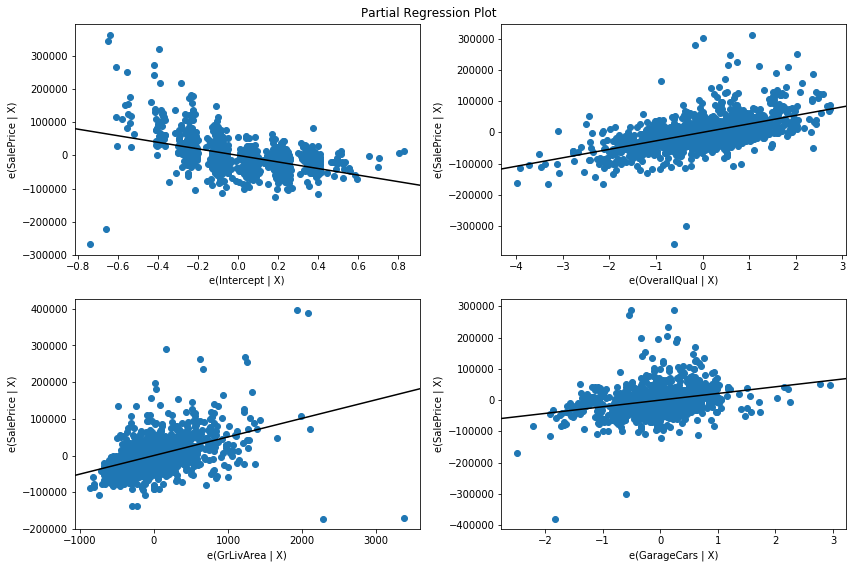

In [397]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model3, fig = fig)

## Model Four

In [398]:
model4 = smf.ols(formula='SalePrice~OverallQual +GrLivArea+ GarageCars + GarageArea + firstFlrSF + TotalBsmtSF + FullBath +TotRmsAbvGrd + YearBuilt',data=H).fit()

**From model, Adj.R-Squared has increased from 73.9 % to 76.9%, Also the intercept is significantly different from zero and two predictor variables(GarageArea and TotRmsAbvGrd) are not significant due to high P-values.** 

In [399]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     540.3
Date:                Tue, 01 May 2018   Prob (F-statistic):               0.00
Time:                        11:20:23   Log-Likelihood:                -17470.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1450   BIC:                         3.501e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.585e+05   9.15e+04     -8.294      0.000   -9.38e+05   -5.79e+05
OverallQual   2.092e+04   1164.267     17.971      0.000    1.86e+04    2.32e+04
GrLivArea       51.3679      4.263     12.051      0.000      43.006      59.730
GarageCars    1.063e+04   3065.576      3.469      0.001    4620.797    1.66e+04
GarageArea      14.5088     10.384      1.397      0.163      -5.861      34.879
firstFlrSF      13.9481      4.965      2.810      0.005       4.210      23.687
TotalBsmtSF     19.2466      4.324      4.451      0.000      10.765      27.728
FullBath     -5410.3114   2684.921     -2.015      0.044   -1.07e+04    -143.567
TotRmsAbvGrd   -86.6391   1126.726     -0.077      0.939   -2296.827    2123.549
YearBuilt      345.3629     47.886      7.212      0.000     251.430     439.295
==============================================================================
Omnibus:                      470.067   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52956.991
Skew:                          -0.413   Prob(JB):                         0.00
Kurtosis:                      32.493   Cond. No.                     2.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### RMSE is lower in model 4 as compared to model 3

In [400]:
Sales_pred4=model4.predict(pd.DataFrame(H[['OverallQual','GrLivArea','GarageCars','GarageArea','firstFlrSF','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']]))
print('MAE:', metrics.mean_absolute_error(H['SalePrice'], Sales_pred4))
print('MSE:', metrics.mean_squared_error(H['SalePrice'], Sales_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(H['SalePrice'], Sales_pred4)))

MAE: 24268.9264172
MSE: 1448653287.06
RMSE: 38061.1782143


In [401]:
residual4= model4.resid

In [402]:
VIF = 1/(1-model4.rsquared)
VIF

4.3535528077623873

**This means that the standard error for the coefficient of that predictor variable in our model is 2.08652 times as large as it would be if that predictor variable were uncorrelated with the other predictor variables.**

In [403]:
np.sqrt(VIF)

2.0865169080940578

### The ANOVA shows that all the predictor variables are significant in model 4

In [404]:
sm.stats.anova_lm(model4, type = 1)

,df,sum_sq,mean_sq,F,PR(>F)
OverallQual,1.0,5.760947e+12,5.760947e+12,3949.522402,0.000000e+00
GrLivArea,1.0,8.150966e+11,8.150966e+11,558.804319,9.125671e-105
GarageCars,1.0,2.292419e+11,2.292419e+11,157.160962,2.642873e-34
GarageArea,1.0,2.489529e+10,2.489529e+10,17.067424,3.813724e-05
firstFlrSF,1.0,1.373445e+11,1.373445e+11,94.159041,1.300730e-21
TotalBsmtSF,1.0,4.814751e+10,4.814751e+10,33.008404,1.116489e-08
FullBath,1.0,5.011479e+08,5.011479e+08,0.343571,5.578664e-01
TotRmsAbvGrd,1.0,8.298051e+08,8.298051e+08,0.568888,4.508236e-01
YearBuilt,1.0,7.587364e+10,7.587364e+10,52.016560,8.832938e-13
Residual,1450.0,2.115034e+12,1.458644e+09,NaN,NaN


**QQ-Plot to evaluate Normality of Residuals for Model 4, which shows no Normality.**

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-487024.26133214, -330994.08272192, -139898.15735325, ...,
          256772.95230748,  268693.23422027,  285943.03664904])),
 (34218.87834737423, 3.9478096842017264e-08, 0.89725796826221749))

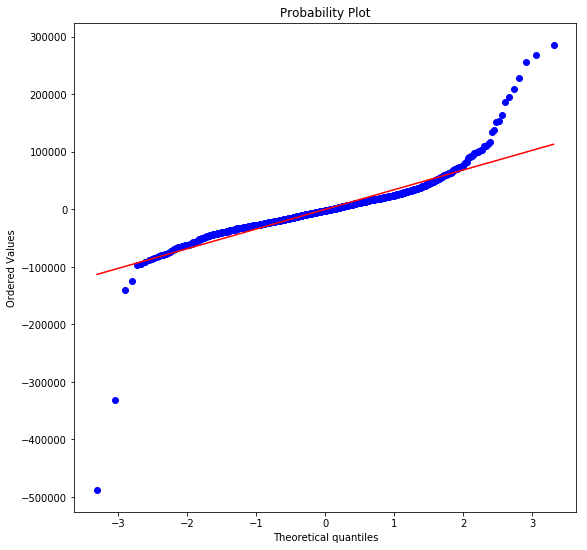

In [405]:
plt.figure(figsize=(9,9))
stats.probplot(residual4, dist="norm", plot=plt)

** Partial Regression Plots to check Constant Variance.**

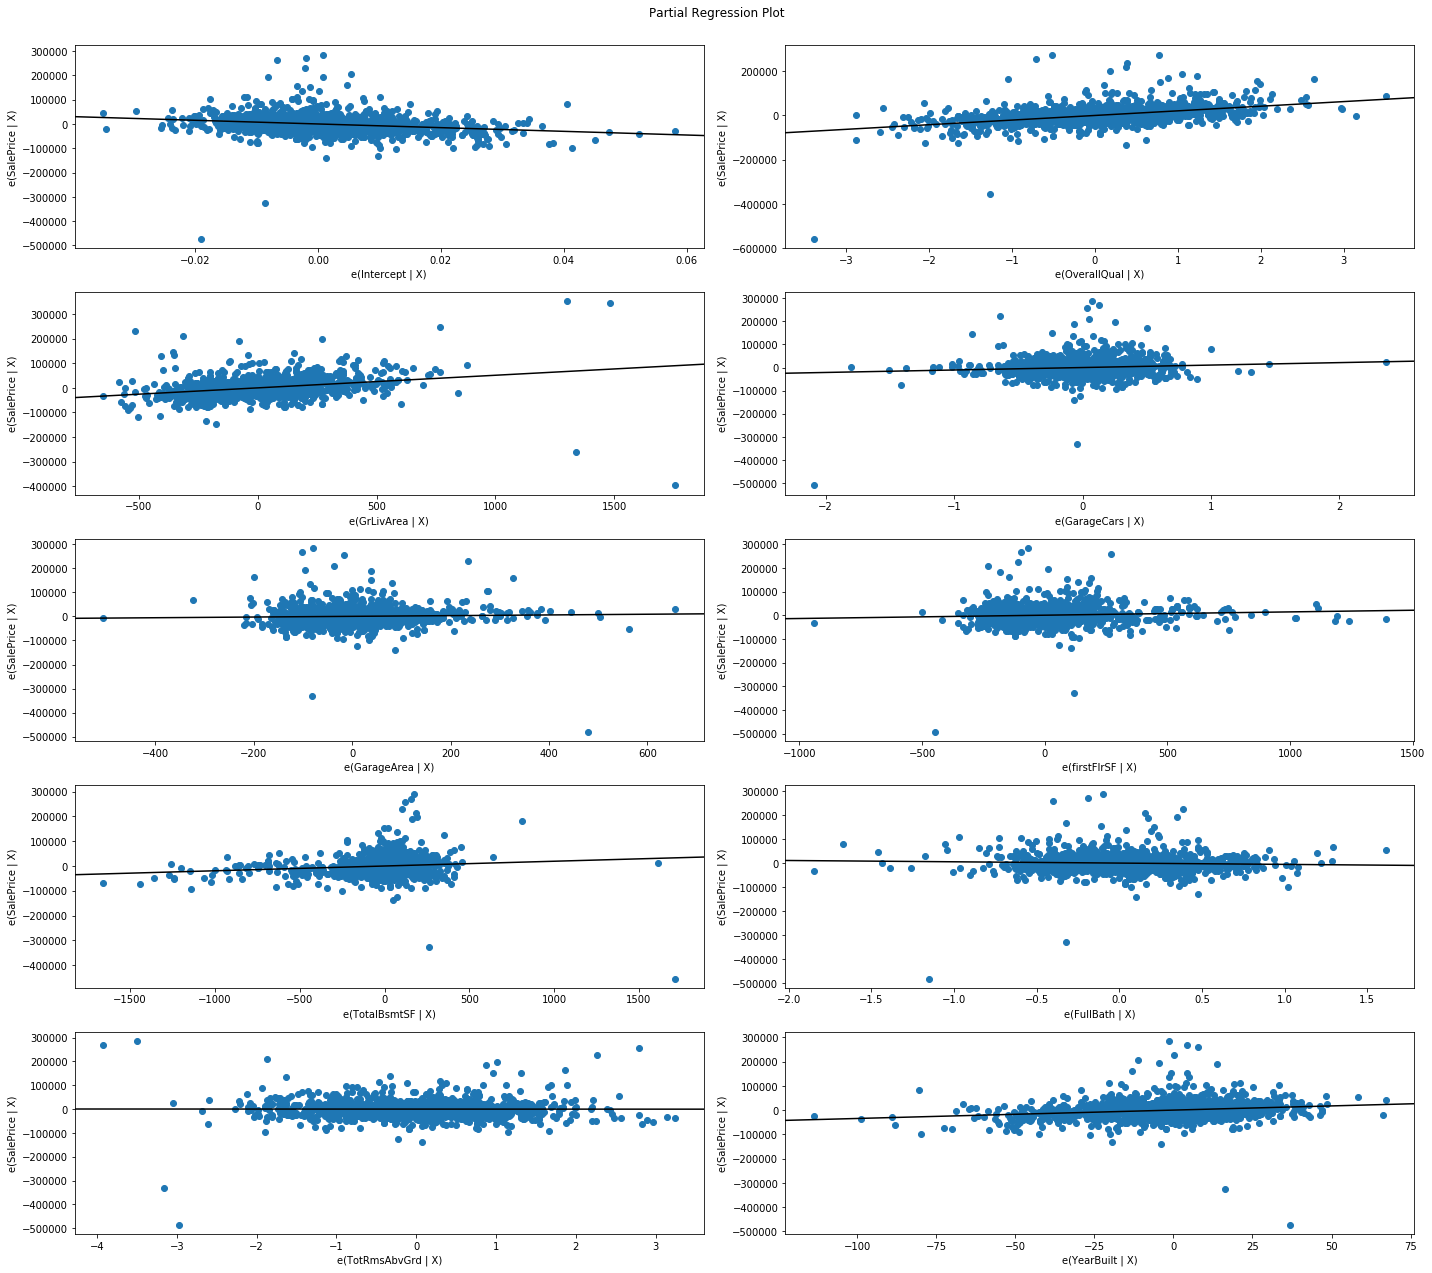

In [406]:
fig = plt.figure(figsize=(20,18))
fig = sm.graphics.plot_partregress_grid(model4, fig = fig)

# Best- Guess Optimal model, (Base model).

### Model 5
* In this model, we eliminated the insignificant variables in model 4

In [407]:
model5 = smf.ols(formula='SalePrice~OverallQual +GrLivArea+ GarageCars + firstFlrSF + TotalBsmtSF + FullBath  + YearBuilt',data=H).fit()

** In this model, Adj. R-Squared is same as in model 4, and all the predictor variables and intercept is significantly different from Zero.**

In [408]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     694.4
Date:                Tue, 01 May 2018   Prob (F-statistic):               0.00
Time:                        11:20:25   Log-Likelihood:                -17471.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1452   BIC:                         3.500e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.626e+05   9.06e+04     -8.413      0.000    -9.4e+05   -5.85e+05
OverallQual  2.091e+04   1161.598     18.001      0.000    1.86e+04    2.32e+04
GrLivArea      51.5215      3.119     16.521      0.000      45.404      57.639
GarageCars   1.405e+04   1829.333      7.683      0.000    1.05e+04    1.76e+04
firstFlrSF     14.4130      4.953      2.910      0.004       4.696      24.130
TotalBsmtSF    19.7871      4.298      4.604      0.000      11.357      28.217
FullBath    -5834.2754   2646.557     -2.204      0.028    -1.1e+04    -642.792
YearBuilt     347.2556     47.663      7.286      0.000     253.760     440.751
==============================================================================
Omnibus:                      454.215   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48784.576
Skew:                          -0.354   Prob(JB):                         0.00
Kurtosis:                      31.310   Cond. No.                     2.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**RMSE has not change that much as compared to the previous model.**

In [409]:
Sales_pred5=model5.predict(pd.DataFrame(H[['OverallQual','GrLivArea','GarageCars','firstFlrSF','TotalBsmtSF','YearBuilt','FullBath']]))
print('MAE:', metrics.mean_absolute_error(H['SalePrice'], Sales_pred5))
print('MSE:', metrics.mean_squared_error(H['SalePrice'], Sales_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(H['SalePrice'], Sales_pred5)))

MAE: 24404.7950551
MSE: 1450633935.29
RMSE: 38087.1885979


In [410]:
residual5= model5.resid

In [411]:
VIF = 1/(1-model5.rsquared)
VIF

4.3476086088340553

### The standard error for the predictor variables in same as that in model 4

In [412]:
np.sqrt(VIF)

2.0850919904968355

### The ANOVA shows that all the predictor variables are significant in model 5

In [413]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
sm.stats.anova_lm(model5, type = 1)

,df,sum_sq,mean_sq,F,PR(>F)
OverallQual,1.0,5.760947e+12,5.760947e+12,3949.570032,0.000000e+00
GrLivArea,1.0,8.150966e+11,8.150966e+11,558.811058,8.677360e-105
GarageCars,1.0,2.292419e+11,2.292419e+11,157.162858,2.626961e-34
firstFlrSF,1.0,1.558828e+11,1.558828e+11,106.869604,3.211803e-24
TotalBsmtSF,1.0,5.113078e+10,5.113078e+10,35.054058,3.995937e-09
FullBath,1.0,2.618061e+08,2.618061e+08,0.179488,6.718763e-01
YearBuilt,1.0,7.742477e+10,7.742477e+10,53.080602,5.233045e-13
Residual,1452.0,2.117926e+12,1.458626e+09,NaN,NaN


** QQ-plots to evaluate Normality of residuals Model 5, which shows no Normality.**

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-479426.54732158, -331574.77765923, -138627.01908638, ...,
          255975.06148059,  267959.60557266,  285472.14322018])),
 (34334.737700398298, 1.0357061339976922e-08, 0.89968110519065403))

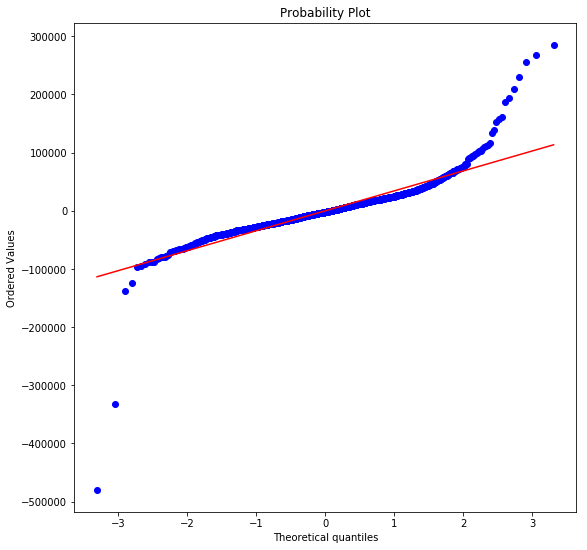

In [414]:
plt.figure(figsize=(9,9))
stats.probplot(residual5, dist="norm", plot=plt)

**Partial Regression Plots to check for Constant Variance.**

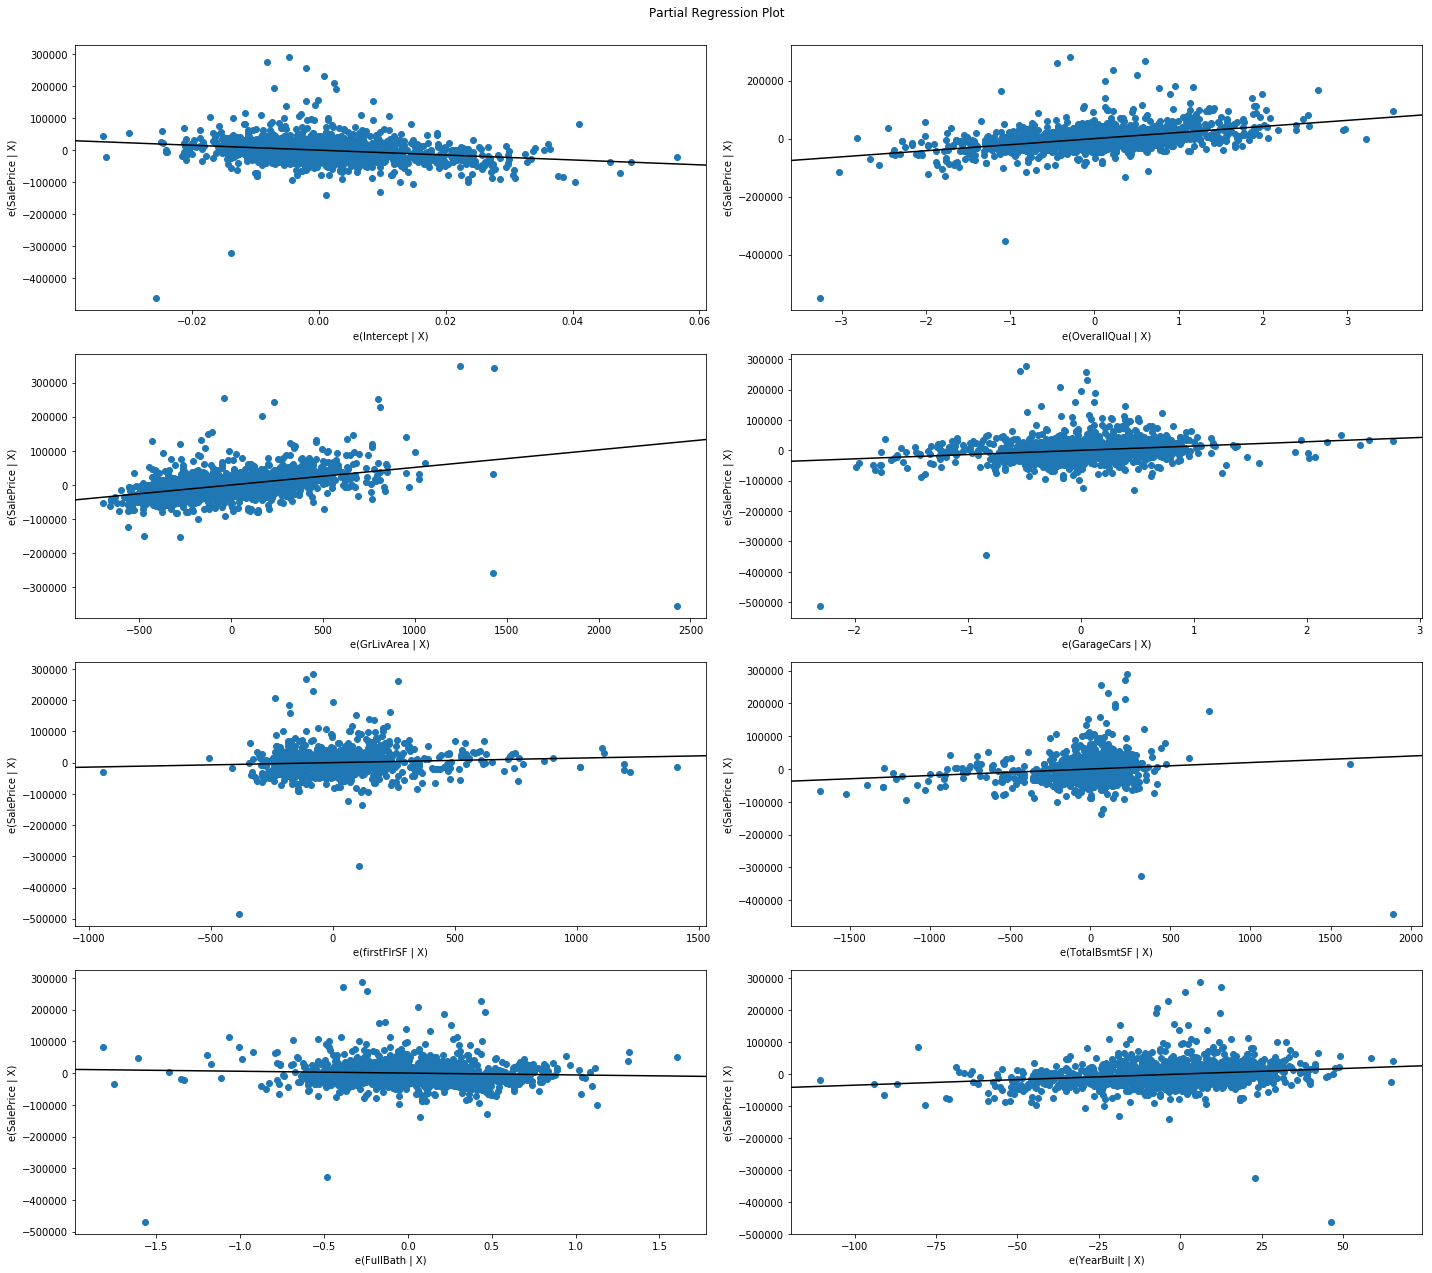

In [415]:
fig = plt.figure(figsize=(20,18))
fig = sm.graphics.plot_partregress_grid(model5, fig = fig)

**An outlier is a data point that diverges from an overall pattern in a sample. An outlier has a large residual (the distance between the predicted value () and the observed value (y)). Outliers lower the significance of the fit of a statistical model because they do not coincide with the model's prediction. An influential point is any point that has a large effect on the slope of a regression line fitting the data. They are generally extreme values. The process to identify an influential point begins by removing the suspected influential point from the data set. If this removal significantly changes the slope of the regression line, then the point is considered an influential point.**

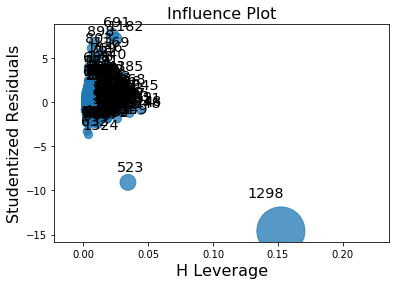

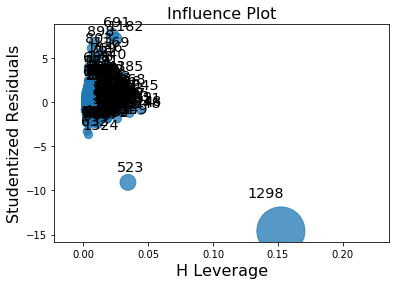

In [416]:
plt.figure(figsize=(9,9))
sm.graphics.influence_plot(model5)

**Boxplot of Residual for Multiple Final regression**

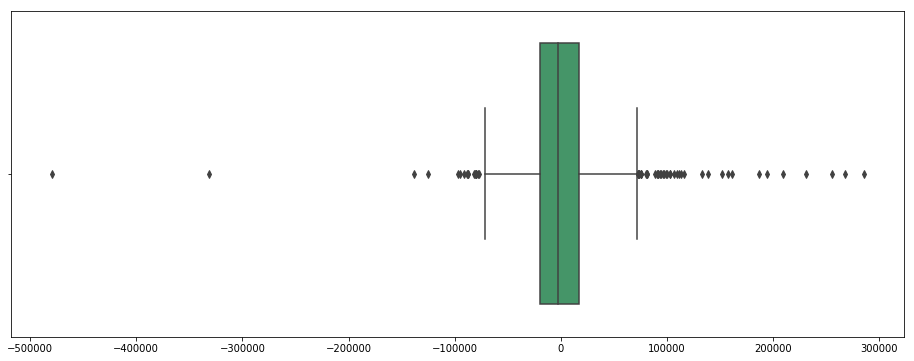

In [417]:
plt.figure(figsize=(16,6))
sns.boxplot(residual5,palette="BuGn_d")

## Leverage points
** leverage is a measure of how far away the independent variable values of an observation are from those of the other observations.**
** High-leverage points are those observations, if any, made at extreme or outlying values of the independent variables such that the lack of neighboring observations means that the fitted regression model will pass close to that particular observation.**

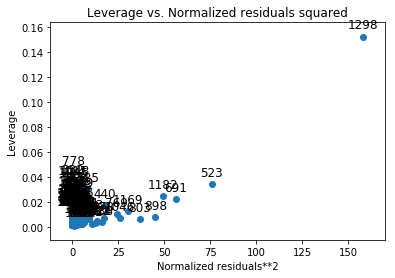

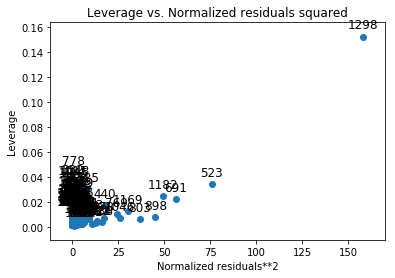

In [418]:
plot_leverage_resid2(model5)

# Ridge and Lasso Regression
**Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors. It is hoped that the net effect will be to give estimates that are more reliable.**
**The VIF calculated above in all the models, shows multicollinearity, hence this forms the basis for our decision to use ridge regression to build the model for the Prices in Ames.** **Ridge regression is a method that seeks to reduce the MSE by adding some bias and, at the same time, reducing the variance.**

**Least absolute shrinkage and selection operator (also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.  Lasso was originally formulated for least squares models and this simple case reveals a substantial amount about the behavior of the estimator, including its relationship to ridge regression and best subset selection and the connections between lasso coefficient estimates and so-called soft thresholding.**

In [419]:
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005,0.0003,0.0002, 5e-4], max_iter=3000) 
regr = RandomForestRegressor(max_depth=10, random_state=0)
X= H
Y= H['SalePrice']
lasso.fit(X, np.log(Y))
regr.fit(X, np.log(Y))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

**Ridge and lasso regression Prediction.**

In [455]:
Ypred_lasso = np.exp(lasso.predict(X))
Ypred_regr= np.exp(regr.predict(X))


In [485]:
print(pd.DataFrame(Ypred_lasso, columns=["SalePrice"]).head(5))

       SalePrice
0  196493.053478
1  188730.708856
2  216032.323309
3  138187.697108
4  260727.593785


In [486]:
print(pd.DataFrame(Ypred_regr, columns=["SalePrice"]).head(5))

       SalePrice
0  208336.159139
1  181564.842364
2  223399.798085
3  139994.598033
4  250000.000000


**RMSE for Ridge and Lasso Calculation**

In [471]:
def rmse_cv(model, X_train, y):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv=10))
    return rmse

print(rmse_cv(lasso, X, np.log(Y)).mean())
print(rmse_cv(regr, X, np.log(Y)).mean())

0.0988066701806
0.0107585310251


# Optimal model(predictive Model) 

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [460]:
housing_test=pd.read_csv("test.csv")

In [475]:
quantitative =[f for f in housing.columns if housing[f].dtype != 'object']
quantitative.remove('Id')
HT=housing_test[quantitative]=housing[quantitative].fillna(housing[quantitative].median())
X_test = HT
Y_test = H["SalePrice"]

In [476]:
predictions = model5.predict(X_test)

In [484]:
print(pd.DataFrame(predictions, columns=["SalePrice"]).head())

       SalePrice
0  213127.150736
1  173644.530069
2  218537.077936
3  202352.790141
4  282076.576971


** Create a scatterplot of the real test values versus the predicted values. **

Text(0,0.5,'Predicted Y')

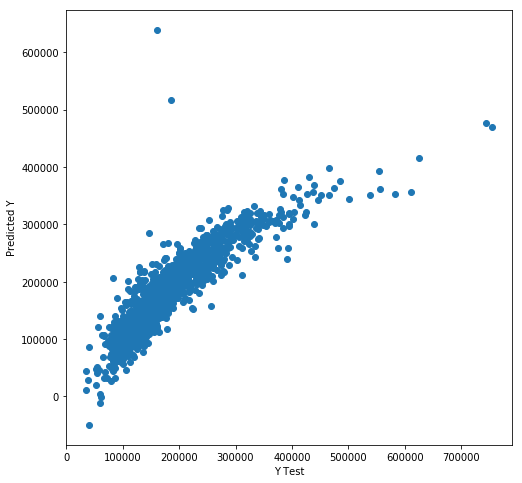

In [464]:
plt.figure(figsize=(8,8))
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [465]:
Ypred_lasso = np.exp(lasso.predict(X_test))
Ypred_regr= np.exp(regr.predict(X_test))

In [483]:
print(pd.DataFrame(Ypred_lasso, columns=["SalePrice"]).head(5))

       SalePrice
0  196493.053478
1  188730.708856
2  216032.323309
3  138187.697108
4  260727.593785


In [482]:
print(pd.DataFrame(Ypred_regr, columns=["SalePrice"]).head(5))

       SalePrice
0  208336.159139
1  181564.842364
2  223399.798085
3  139994.598033
4  250000.000000


In [468]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 24404.7950551
MSE: 1450633935.29
RMSE: 38087.1885979


In [478]:
def rmse_cv(model, X_test, y):
    rmse = np.sqrt(-cross_val_score(model, X_test, y, scoring="neg_mean_squared_error", cv=10))
    return rmse

print(rmse_cv(lasso, X_test, np.log(Y_test)).mean())
print(rmse_cv(regr, X_test, np.log(Y_test)).mean())

0.0988066701806
0.0107585310251


# Conclusion


**From the RMSE in evaluating the Model section  we can observe that the RMSE from the Lasso regression and  the ridge regression techniques have a realtively small RMSE which is our goal as compared to the multiple linear regression model.
Comparing Ridge and Lasso regression it is clear that the ridge regression is better even though the difference in RMSE is not statistically different.**

**We advice to use the Ridge regression Model in order to predict the Price of Housing in Ames-Iowa**
**Further Machine Learning classifications methods and non parametric regression methods can be used to build a model.**